<a href="https://colab.research.google.com/github/alexlopespereira/mba_enap/blob/main/CD/Atividades_Exercicios/Aula1_Atividades_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Atividades e Exercícios (vale nota)
### Compartilhe o seu caderno com o professor enviando o link para o seu caderno [neste formulário](https://forms.gle/UYvwc6SpA6HyiqdM6).



### Importar as bibliotecas

In [ ]:
import numpy as np # Importar o numpy
import pandas as pd



## Atividade 1.1
#### Vamos tentar reproduzir este [gráfico](http://berkeleyearth.org/dv/temperature-change-vs-carbon-dioxide-concentration/) que mostra a correlação entre o aumento de emissão de CO2 e o aumento médio da temperatura global.
#### Não precisa ficar exatamente igual. Use o seu bom senso de quantos detalhes quer adicionar ao gráfico.


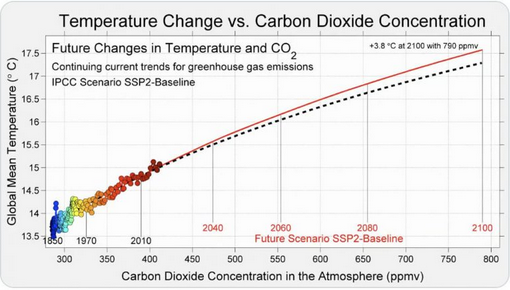

In [ ]:
# Fonte: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
# Vamos usar a variável da coluna co2
dfco2_orig = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")
dfco2_orig

In [ ]:
# Vamos agregar pelo ano e somar a emissão de co2
# Transforme a serie agregada num dataframe e converta indice para coluna
dfco2g = dfco2_orig.groupby('year')['co2'].sum().to_frame().reset_index()
dfco2g.head()

,year,co2
0,1750,46.755
1,1751,46.755
2,1752,46.770
3,1753,46.770
4,1754,46.790


In [ ]:
# Faça o merge dos dois dataframes: de temperatura e de CO2
dfmerge = df.merge(dfco2g, left_on='ano', right_on='year')
dfmerge['co2'] = dfmerge['co2'].round(1)
dfmerge.head()

,Anomaly,ano,mes,mes_num,date,year,co2
0,-2.70,1880,jan,1,1880-1-01,1880,3852.3
1,-2.33,1880,feb,2,1880-2-01,1880,3852.3
2,-1.58,1880,mar,3,1880-3-01,1880,3852.3
3,-0.67,1880,apr,4,1880-4-01,1880,3852.3
4,0.35,1880,may,5,1880-5-01,1880,3852.3


In [ ]:
dfmerge.to_json('./temperature_anomalies_co2.json', orient='records')

## Atividade 1.2
### Repita o gráfico Seasonal Changes presente nesse link http://berkeleyearth.lbl.gov/regions/global-land.

### Não precisa ficar igual, porém, quanto mais você se aproximar, maior será o seu domínio sobre a ferramenta de graficos. É uma oportunidade para você treinar sua capacidade de pesquisar uma solução para um problema específico.



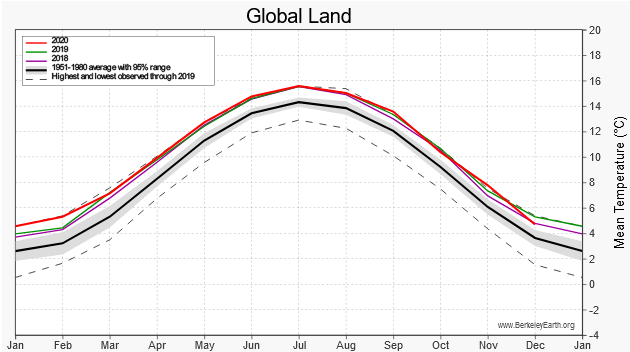



#### Plote as séries de 2016 a 2019 separadamente (não temos as série 2020 no nosso dataset). E uma linha média com seu intervalo de confiança de 95% para os  anos de 1961 a 1980.
#### Você vai precisar dos dados de máximo e mínimo para o ano de 2019. Podem ser encontrados [aqui](http://berkeleyearth.lbl.gov/auto/Global/Complete_TMAX_complete.txt) e [aqui](http://berkeleyearth.lbl.gov/auto/Global/Complete_TMIN_complete.txt).

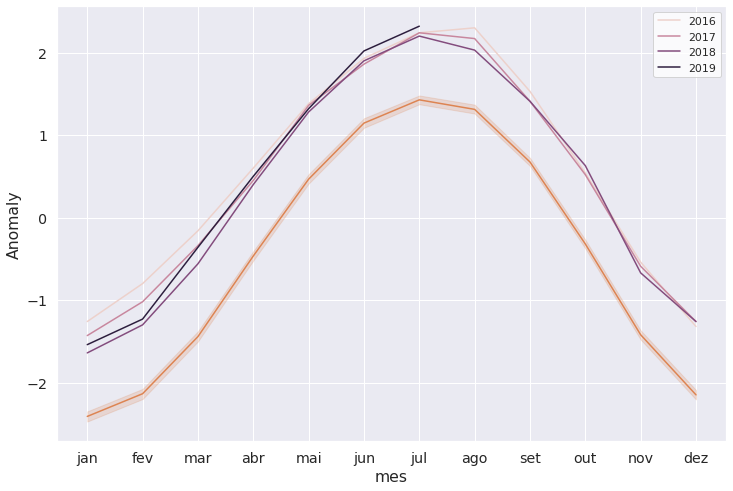

In [ ]:
# !pip install pandas-profiling==2.8.0